In [ ]:
import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 
import glob
import zipfile

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
!pip install seaborn
import seaborn as sb 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks/demo'

S01  S04  S07  S10  S13  S16  S19  S22	S25  S28  S31  S34
S02  S05  S08  S11  S14  S17  S20  S23	S26  S29  S32  S35
S03  S06  S09  S12  S15  S18  S21  S24	S27  S30  S33


**heart beat variability gives idea of stress (60<HR<100). This can help us find labels**

In [ ]:
  # Create an empty DataFrame to store the data
dir_path =  r"/content/drive/MyDrive/Colab Notebooks/demo"
HR_df = pd.DataFrame()
  # Loop through all the subdirectories and files in the directory
for root, dirs, files in os.walk(dir_path):
    for file in files:
    # Check if the file is a CSV file
      if file.endswith('HR.csv'):
    # Read the CSV file into a DataFrame
        file_path = os.path.join(root, file)
        tdf = os.path.basename(os.path.dirname(file_path))
        temp_df = pd.read_csv(file_path, header=None, nrows=100) # 100 samples per file
        # Append the DataFrame to the main DataFrame
        HR_df = HR_df.append(temp_df, ignore_index=True)
HR_df.columns = ['HR']
print(HR_df)

                HR
0     1.646658e+09
1     1.000000e+00
2     8.300000e+01
3     8.300000e+01
4     7.200000e+01
...            ...
3495  7.963000e+01
3496  7.905000e+01
3497  7.858000e+01
3498  7.808000e+01
3499  7.763000e+01

[3500 rows x 1 columns]


In [ ]:
# extract ACC features

dir_path =  r"/content/drive/MyDrive/Colab Notebooks/demo"


# Create an empty DataFrame to store the data
acc_df = pd.DataFrame()

# Loop through all the subdirectories and files in the directory
for root, dirs, files in os.walk(dir_path):
    for file in files:
        # Check if the file is a CSV file
        if file.endswith('ACC.csv'):
          # Read the CSV file into a DataFrame
          file_path = os.path.join(root, file)
          temp_df = pd.read_csv(file_path, header=None, nrows=100) # 100 features per folder
          # Append the DataFrame to the main DataFrame
          acc_df = acc_df.append(temp_df, ignore_index=True)
               
# Print the final DataFrame
# Acc_df = acc_df.drop(['count', 'mean','min', '25%','75%', 'max'], axis=1)
acc_df.columns = ['ACC_x', 'ACC_y', 'ACC_z']
print(acc_df)

             ACC_x         ACC_y         ACC_z
0     1.646658e+09  1.646658e+09  1.646658e+09
1     3.200000e+01  3.200000e+01  3.200000e+01
2    -3.300000e+01  0.000000e+00  5.600000e+01
3    -3.200000e+01  0.000000e+00  5.600000e+01
4    -3.200000e+01  0.000000e+00  5.600000e+01
...            ...           ...           ...
3495  7.000000e+00  2.100000e+01  6.000000e+01
3496  6.000000e+00  2.100000e+01  6.000000e+01
3497  6.000000e+00  2.100000e+01  6.000000e+01
3498  6.000000e+00  2.100000e+01  6.000000e+01
3499  6.000000e+00  2.100000e+01  6.000000e+01

[3500 rows x 3 columns]


In [ ]:
# bvp features

bvp_df = pd.DataFrame()

# Loop through all the subdirectories and files in the directory
for root, dirs, files in os.walk(dir_path):
    for file in files:
        # Check if the file is a CSV file
        if file.endswith('BVP.csv'):
            # Read the CSV file into a DataFrame
            file_path = os.path.join(root, file)
            temp_df = pd.read_csv(file_path, header=None, nrows=100)
            # Append the DataFrame to the main DataFrame
            bvp_df = bvp_df.append(temp_df, ignore_index=True)
               
# Bvp_df = bvp_df.drop(['count', 'mean','min', '25%','75%', 'max'], axis=1)
bvp_df.columns = ['BVP']
print(bvp_df)

               BVP
0     1.646658e+09
1     6.400000e+01
2    -0.000000e+00
3    -0.000000e+00
4    -0.000000e+00
...            ...
3495 -4.509100e+02
3496 -4.865000e+02
3497 -5.157400e+02
3498 -5.372300e+02
3499 -5.492200e+02

[3500 rows x 1 columns]


In [ ]:
# eda features

eda_df = pd.DataFrame()

  # Loop through all the subdirectories and files in the directory
for root, dirs, files in os.walk(dir_path):
    for file in files:
        # Check if the file is a CSV file
        if file.endswith('EDA.csv'):
            # Read the CSV file into a DataFrame
            file_path = os.path.join(root, file)
            temp_df = pd.read_csv(file_path, header=None,nrows=100)
            # Append the DataFrame to the main DataFrame
            eda_df = eda_df.append(temp_df, ignore_index=True)
               
# eda_df = eda_df.drop(['count','mean', 'min','max'], axis=1)
eda_df.columns = ['EDA']
print(eda_df)

               EDA
0     1.646658e+09
1     4.000000e+00
2     0.000000e+00
3     1.884120e-01
4     2.563430e-01
...            ...
3495  2.152770e-01
3496  2.139950e-01
3497  2.152770e-01
3498  2.152770e-01
3499  2.139950e-01

[3500 rows x 1 columns]


In [ ]:
# temp features

t_df = pd.DataFrame()

# Loop through all the subdirectories and files in the directory
for root, dirs, files in os.walk(dir_path):
    for file in files:
        # Check if the file is a CSV file
        if file.endswith('TEMP.csv'):
            # Read the CSV file into a DataFrame
            file_path = os.path.join(root, file)
            temp_df = pd.read_csv(file_path, header=None,nrows=100)
            # Append the DataFrame to the main DataFrame
            t_df = t_df.append(temp_df, ignore_index=True)
               
# Print the final DataFrame
# t_df = t_df.drop(['count','mean', 'min','max'], axis=1)
t_df.columns = ['Temp']
print(t_df)

              Temp
0     1.646658e+09
1     4.000000e+00
2     3.329000e+01
3     3.329000e+01
4     3.329000e+01
...            ...
3495  3.315000e+01
3496  3.315000e+01
3497  3.315000e+01
3498  3.318000e+01
3499  3.318000e+01

[3500 rows x 1 columns]


In [ ]:
df =pd.DataFrame()
df = pd.concat([acc_df, bvp_df, eda_df, t_df], axis=1) # merging features

In [ ]:
df.info() # total feature info --- 6 features based on data exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ACC_x   3500 non-null   float64
 1   ACC_y   3500 non-null   float64
 2   ACC_z   3500 non-null   float64
 3   BVP     3500 non-null   float64
 4   EDA     3500 non-null   float64
 5   Temp    3500 non-null   float64
dtypes: float64(6)
memory usage: 164.2 KB


In [ ]:
df.describe()

,ACC_x,ACC_y,ACC_z,BVP,EDA,Temp
count,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03
mean,1.645650e+07,1.645652e+07,1.645656e+07,1.645651e+07,1.645651e+07,1.645654e+07
std,1.637637e+08,1.637637e+08,1.637637e+08,1.637637e+08,1.637637e+08,1.637637e+08
min,-7.100000e+01,-9.600000e+01,-6.300000e+01,-5.574400e+02,0.000000e+00,4.000000e+00
25%,-3.200000e+01,-2.000000e+00,4.600000e+01,-0.000000e+00,1.409460e-01,2.909000e+01
50%,-1.600000e+01,2.000000e+00,5.700000e+01,8.725000e+00,2.409630e-01,3.095000e+01
75%,-4.000000e+00,1.900000e+01,6.200000e+01,6.616750e+01,5.760200e-01,3.293000e+01
max,1.646839e+09,1.646839e+09,1.646839e+09,1.646839e+09,1.646839e+09,1.646839e+09


In [ ]:
from sklearn.preprocessing import Normalizer
# create list of column names to use later
col_names = list(df.columns)
df = Normalizer().fit_transform(df)
df = pd.DataFrame(df, columns=col_names)
df

,ACC_x,ACC_y,ACC_z,BVP,EDA,Temp
0,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248
1,0.377124,0.377124,0.377124,0.754247,0.047140,0.047140
2,-0.451876,0.000000,0.766819,-0.000000,0.000000,0.455847
3,-0.440876,0.000000,0.771533,-0.000000,0.002596,0.458649
4,-0.440875,0.000000,0.771531,-0.000000,0.003532,0.458647
...,...,...,...,...,...,...
3495,0.015330,0.045989,0.131398,-0.987479,0.000471,0.072597
3496,0.012200,0.042701,0.122003,-0.989242,0.000435,0.067407
3497,0.011522,0.040328,0.115222,-0.990410,0.000413,0.063660
3498,0.011070,0.038743,0.110695,-0.991149,0.000397,0.061215


In [ ]:
Norm_data= pd.DataFrame(df).corr(method='pearson')
Norm_data

,ACC_x,ACC_y,ACC_z,BVP,EDA,Temp
ACC_x,1.000000,-0.110079,-0.026609,-0.010348,0.251321,-0.275280
ACC_y,-0.110079,1.000000,0.104507,0.028541,0.180199,0.056532
ACC_z,-0.026609,0.104507,1.000000,0.026630,0.004206,0.589051
BVP,-0.010348,0.028541,0.026630,1.000000,0.053907,0.041836
EDA,0.251321,0.180199,0.004206,0.053907,1.000000,0.075718
Temp,-0.275280,0.056532,0.589051,0.041836,0.075718,1.000000


<Axes: >

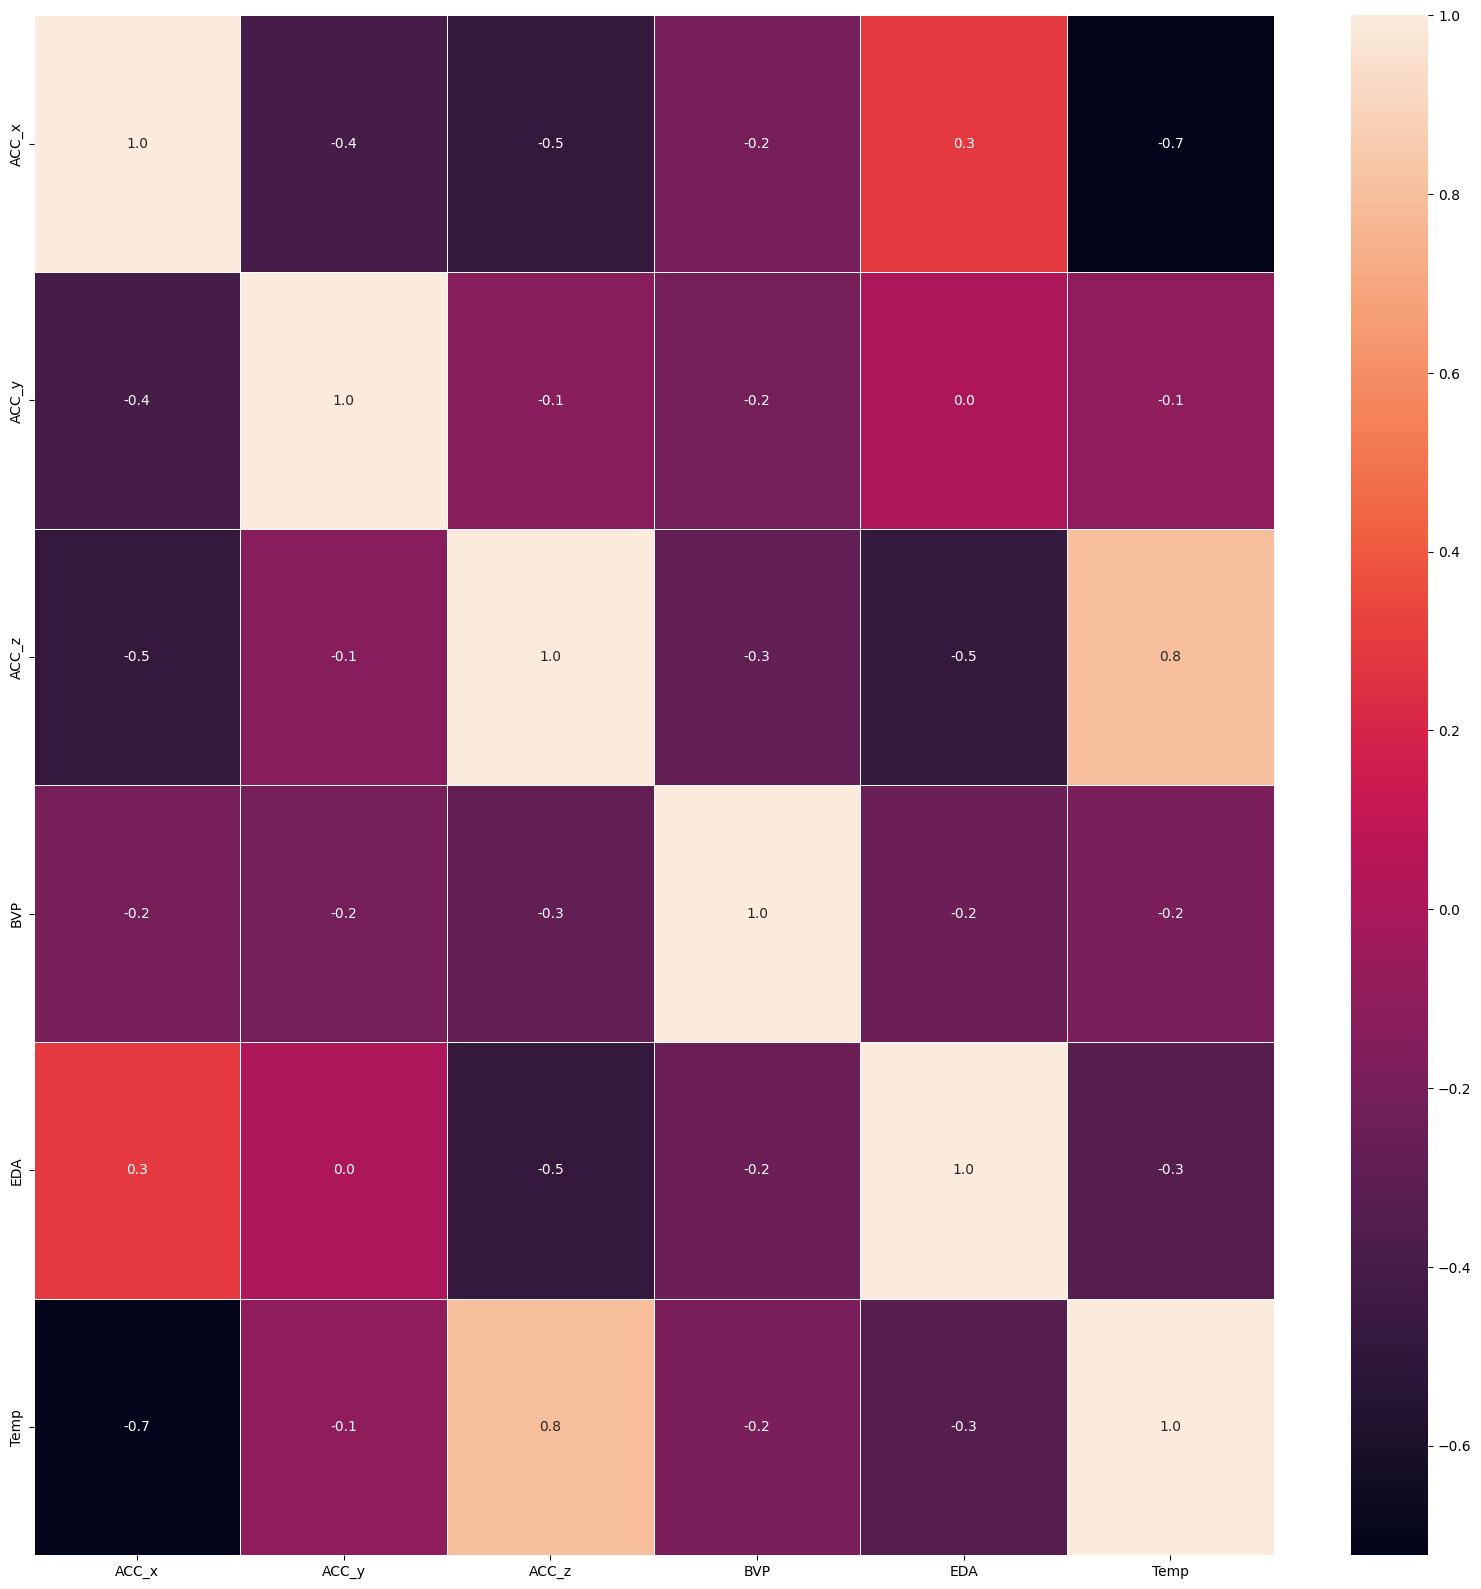

In [ ]:
f,ax = plt.subplots(figsize=(20, 20))
sb.heatmap(Norm_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

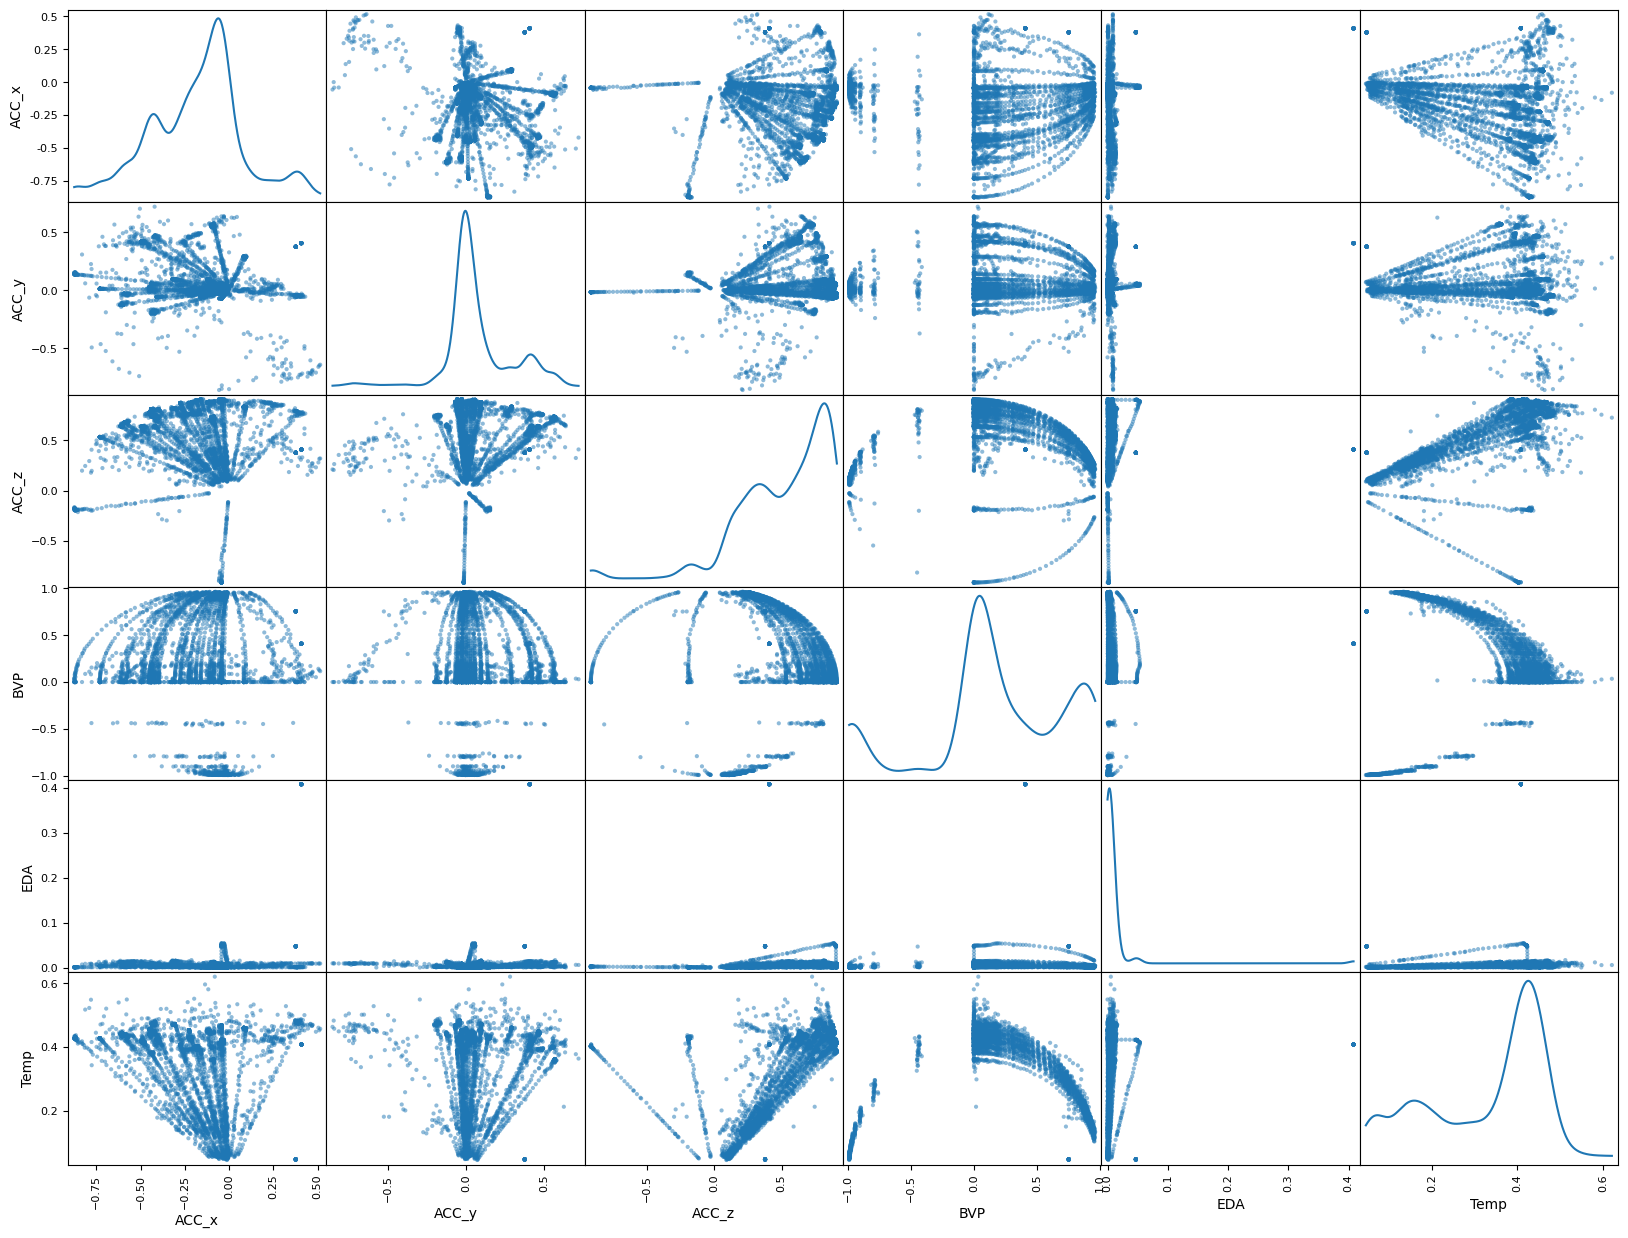

In [ ]:
from sklearn import preprocessing

df1 = pd.concat([acc_df, bvp_df, eda_df, t_df], axis=1) # merging features
# create list of column names to use later
col_names = list(df1.columns)
df_s = Normalizer().fit_transform(df1)
df1 = pd.DataFrame(df_s, columns=col_names)

# time series plot for multiple columns
pd.plotting.scatter_matrix(df1.loc[:,:], diagonal="kde",figsize=(20,15))
plt.show()

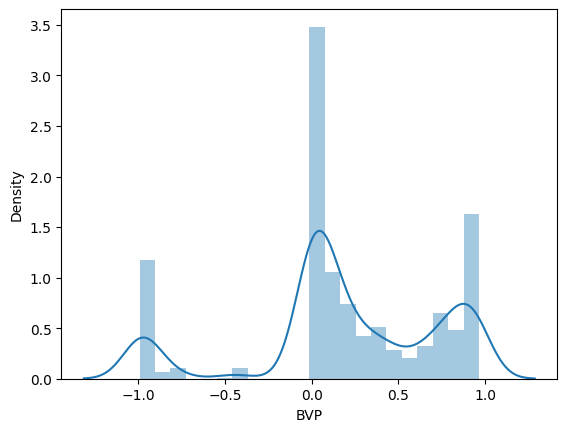

In [ ]:
sns.distplot(df1['BVP'])
plt.show()

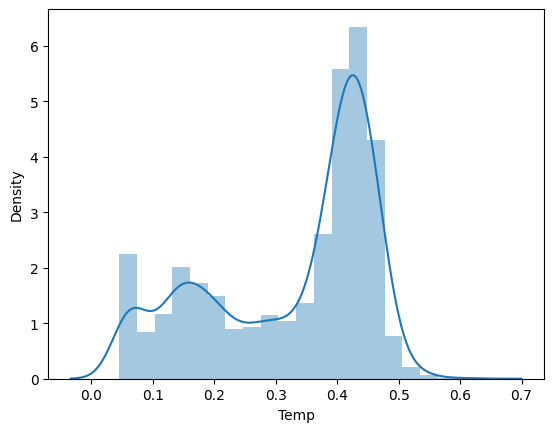

In [ ]:
sns.distplot(df1['Temp'])
plt.show()

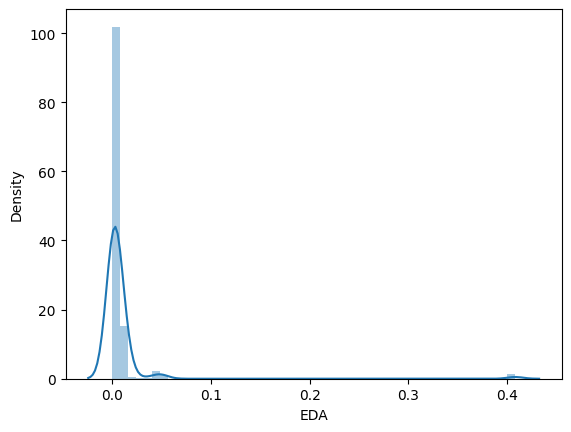

In [ ]:
sns.distplot(df1['EDA'])
plt.show()

<Axes: title={'center': 'After Normaliation'}, xlabel='Temp', ylabel='Density'>

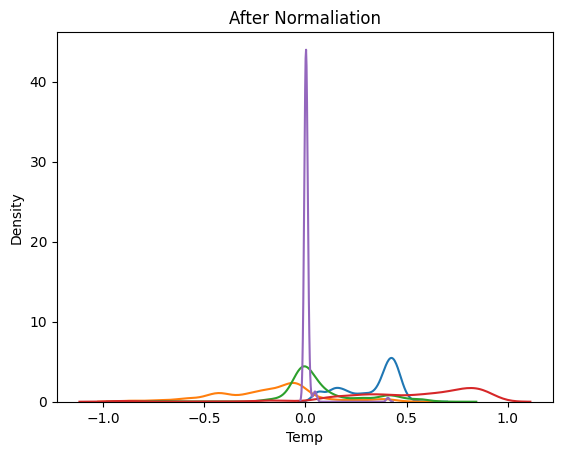

In [ ]:
df_r = pd.DataFrame(df1, columns=col_names)
fig, (ax1) = plt.subplots(ncols=1)
ax1.set_title('After Normaliation')

sns.kdeplot(df1['Temp'], ax=ax1)
sns.kdeplot(df1['ACC_x'], ax=ax1)
sns.kdeplot(df1['ACC_y'], ax=ax1)
sns.kdeplot(df1['ACC_z'], ax=ax1)
sns.kdeplot(df1['EDA'], ax=ax1)

In [ ]:
# labels from HR data

labels = HR_df
labels.columns = ['label'] 
labels.label[labels.label > 100] = 0
labels.label[labels.label < 60] = 0
labels.label[labels.label > 1] = 1

In [ ]:
print(labels)

      label
0       0.0
1       0.0
2       1.0
3       1.0
4       1.0
...     ...
3495    1.0
3496    1.0
3497    1.0
3498    1.0
3499    1.0

[3500 rows x 1 columns]


In [ ]:
y = labels
x =df

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
y_test

,label
69,1.0
1338,1.0
3449,1.0
1227,1.0
3331,1.0
...,...
2884,1.0
1804,1.0
3011,1.0
1759,1.0


In [ ]:
x_test

,ACC_x,ACC_y,ACC_z,BVP,EDA,Temp
69,-0.232536,0.000000,0.394606,0.857774,0.001797,0.233311
1338,-0.490630,0.420540,0.630809,0.116489,0.006865,0.413390
3449,0.093169,0.292817,0.798591,0.270456,0.002661,0.441222
1227,-0.604767,-0.126579,0.646960,0.033754,0.011881,0.445418
3331,-0.305502,0.097205,0.819302,0.061378,0.014060,0.471168
...,...,...,...,...,...,...
2884,-0.020055,-0.006685,-0.421157,0.887505,0.000925,0.185777
1804,-0.123624,0.082416,0.879106,-0.000000,0.000528,0.452877
3011,-0.057765,0.606533,0.678739,0.000000,0.002405,0.409987
1759,-0.470813,-0.022420,0.538072,0.606452,0.001221,0.347168


In [ ]:
# KNN model training

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[ 58  24]
 [  4 964]]
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81        82
         1.0       0.98      1.00      0.99       968

    accuracy                           0.97      1050
   macro avg       0.96      0.85      0.90      1050
weighted avg       0.97      0.97      0.97      1050



In [ ]:
classifier = SVC(C=0.05)
classifier.fit(x_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(x_test)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

[[  0  82]
 [  0 968]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        82
         1.0       0.92      1.00      0.96       968

    accuracy                           0.92      1050
   macro avg       0.46      0.50      0.48      1050
weighted avg       0.85      0.92      0.88      1050

